In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#from keras.callbacks import EarlyS
from keras.callbacks import EarlyStopping

In [4]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [5]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

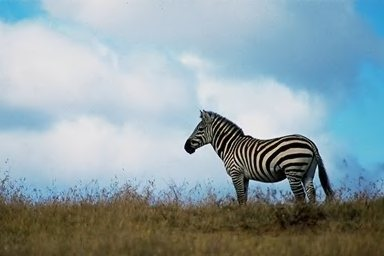

In [6]:
real_image_path = 'C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Au/Au_ani_00001.jpg'
Image.open(real_image_path)

In [7]:
convert_to_ela_image(real_image_path, 90)

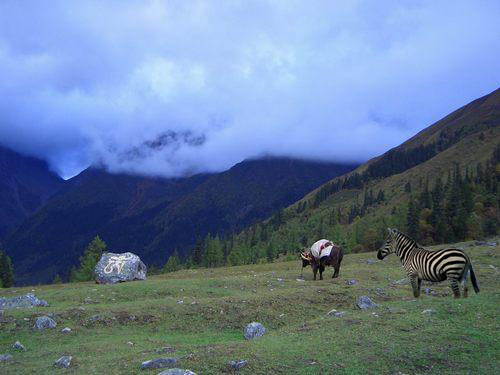

In [8]:
fake_image_path = 'C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
Image.open(fake_image_path)

In [9]:
convert_to_ela_image(fake_image_path, 90)

DENOISING REAL IMAGE

In [10]:

# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

img_r=skimage.io.imread('C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Au/Au_ani_00001.jpg')
img_r=skimage.img_as_float(img_r) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation
sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_r,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


C:\Users\prati\.conda\envs\myenv\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [11]:
import cv2
psnr_noisy = cv2.PSNR(img_r,img_r)
psnr_noisy

361.20199909921956

In [12]:
psnr_bayes = cv2.PSNR(img_r,img_bayes)
psnr_bayes

122.94205708554246

In [13]:
psnr_visu = cv2.PSNR(img_r,img_visushrink)
psnr_bayes

122.94205708554246

In [14]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,1)
plt.imshow(img_r,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Bayes Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Visushrink Image',fontsize=30)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [15]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)


PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 100.27511465238143
PSNR[Original vs. Denoised(Bayes)] 122.94205708554246


DENOISING FAKE IMAGE

In [16]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io

img_f=skimage.io.imread('C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg')
img_f=skimage.img_as_float(img_f) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_f,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_f,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_f,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


In [17]:
import cv2
psnr_noisy = cv2.PSNR(img_f,img_f)
psnr_noisy

361.20199909921956

In [18]:
psnr_bayes = cv2.PSNR(img_f,img_bayes)
psnr_bayes

120.58626094108676

In [19]:
psnr_visu = cv2.PSNR(img_f,img_visushrink)
psnr_bayes

120.58626094108676

In [20]:
# Plotting images
plt.figure(figsize=(30,30))

#plt.subplot(2,2,1)
#plt.imshow(img,cmap=plt.cm.gray)
#plt.title('Original Image',fontsize=30)

plt.subplot(2,2,1)
plt.imshow(img_f,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Bayes Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Visushrink Image',fontsize=30)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [21]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)

PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 97.24783471476827
PSNR[Original vs. Denoised(Bayes)] 120.58626094108676


In [22]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

In [23]:
def denoise_img(img):
    #img=skimage.io.imread('C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg')
    img=skimage.img_as_float(img_f) #converting image as float


    sigma_est=estimate_sigma(img,multichannel=True,average_sigmas=True)  #Noise estimation

    # Denoising using Bayes
    img_bayes=denoise_wavelet(img,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


    #Denoising using Visushrink
    img_visushrink=denoise_wavelet(img,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
    wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)
    return img_bayes 


In [24]:
image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [25]:
import random
path = 'C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Au/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
2100 2100


In [26]:
path = 'C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Tp/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
4164 4164


In [27]:
import numpy as np
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3331 3331
833 833


In [29]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='valid', activation='relu'))
    model.add(MaxPool2D(pool_size =2, strides=None, padding='valid', data_format='channels_last'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.50))
    model.add(Dense(2, activation = 'softmax'))
    return model

In [30]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               7373056   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [31]:
from tensorflow.keras import optimizers
optimizer = optimizers.RMSprop(learning_rate=1e-4, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [32]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
x_train2 = np.array(X_train, copy=True) 
y_train2 = np.array(Y_train, copy=True) 

epochs = 30
batch_size = 32

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

datagen.fit(X_train)

print(type(X_train))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto')

validation_generator = datagen.flow(x_train2, y_train2, batch_size=batch_size, subset='validation')
train_generator = datagen.flow(x_train2, y_train2,batch_size=batch_size, subset='training')

# # fits the model on batches with real-time data augmentation:
history = model.fit(train_generator, epochs=epochs, validation_data = (X_val,Y_val),verbose=2, callbacks = [early_stopping])

<class 'numpy.ndarray'>
Epoch 1/30
84/84 - 64s - loss: 0.6251 - accuracy: 0.6582 - val_loss: 0.6821 - val_accuracy: 0.7359
Epoch 2/30
84/84 - 47s - loss: 0.5114 - accuracy: 0.7557 - val_loss: 0.7023 - val_accuracy: 0.4886
Epoch 3/30
84/84 - 49s - loss: 0.4187 - accuracy: 0.8218 - val_loss: 0.7245 - val_accuracy: 0.4886
Epoch 4/30
84/84 - 41s - loss: 0.3692 - accuracy: 0.8480 - val_loss: 0.7446 - val_accuracy: 0.4886
Epoch 5/30
84/84 - 41s - loss: 0.3431 - accuracy: 0.8593 - val_loss: 0.7639 - val_accuracy: 0.4886
Epoch 6/30
84/84 - 39s - loss: 0.3212 - accuracy: 0.8795 - val_loss: 0.8038 - val_accuracy: 0.4886
Epoch 7/30
84/84 - 40s - loss: 0.3034 - accuracy: 0.8833 - val_loss: 0.8166 - val_accuracy: 0.4886
Epoch 8/30
84/84 - 44s - loss: 0.2888 - accuracy: 0.8829 - val_loss: 0.8151 - val_accuracy: 0.4886
Epoch 9/30
84/84 - 51s - loss: 0.2709 - accuracy: 0.8972 - val_loss: 0.8185 - val_accuracy: 0.4886
Epoch 10/30
84/84 - 42s - loss: 0.2585 - accuracy: 0.9043 - val_loss: 0.8346 - val_ac

In [33]:

init_lr = 1e-4
optimizer = Adam(learning_rate = init_lr, decay = init_lr/epochs)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 30,
                              verbose = 0,
                              mode = 'auto')

In [35]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/30
105/105 [==============================] - 46s 416ms/step - loss: 0.6799 - accuracy: 0.5731 - val_loss: 0.5630 - val_accuracy: 0.7275
Epoch 2/30
105/105 [==============================] - 42s 403ms/step - loss: 0.4129 - accuracy: 0.8406 - val_loss: 0.3584 - val_accuracy: 0.8667
Epoch 3/30
105/105 [==============================] - 46s 443ms/step - loss: 0.3130 - accuracy: 0.8940 - val_loss: 0.2954 - val_accuracy: 0.8980
Epoch 4/30
105/105 [==============================] - 43s 411ms/step - loss: 0.2809 - accuracy: 0.9006 - val_loss: 0.2693 - val_accuracy: 0.9028
Epoch 5/30
105/105 [==============================] - 44s 424ms/step - loss: 0.2510 - accuracy: 0.9159 - val_loss: 0.2378 - val_accuracy: 0.9148
Epoch 6/30
105/105 [==============================] - 44s 418ms/step - loss: 0.2306 - accuracy: 0.9219 - val_loss: 0.2380 - val_accuracy: 0.9184
Epoch 7/30
105/105 [==============================] - 43s 412ms/step - loss: 0.2104 - accuracy: 0.9307 - val_loss: 0.2176 - val_ac

In [36]:
model.save('model_casia_run1.h5')

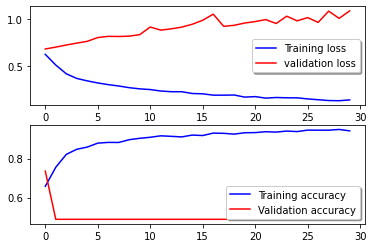

In [37]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, ['fake','real'])

In [40]:
from sklearn import metrics
score = metrics.accuracy_score(Y_true, Y_pred_classes)
print("Accuracy: {}".format(score))
score = metrics.precision_score(Y_true, Y_pred_classes, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(Y_true, Y_pred_classes, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(Y_true, Y_pred_classes, average= "weighted")
print("F1 score: {}".format(score_lr1))

Accuracy: 0.9279711884753902
Precision score: 0.9279711884753902
Recall score: 0.9279711884753902
F1 score: 0.9279711884753902


In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming that you have true binary labels y_true and predicted scores y_score
fpr, tpr, thresholds = roc_curve(Y_true, Y_pred_classes)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
class_names = ['fake', 'real']

In [43]:
fake_image = os.listdir('C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Tp/')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        fake_image_path = os.path.join('C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Tp/', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
#             print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [44]:
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 2064, Correct: 2031, Acc: 98.40116279069767


In [45]:
real_image = os.listdir('C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Au/')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('C:/Users/prati/ImageForgeryDetection/Dataset/CASIA2/Au/', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
            #print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [51]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')
#print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')


Total: 7354, Correct: 6963, Acc: 94.68316562415012
Total: 16772, Correct: 15957, Acc: 95.1407107083234
